In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes

import sys
sys.path.append("../library-Git/")
from defaultPlot import logFit
from stringFormat import *
from readData import read

# Read Data

In [2]:
networkSize = 10000
acceptanceThreshold = 0.5
time = np.linspace(0, 1, networkSize+1)
time = time[:-1]
checkTime = [0.9320, 0.9370, 0.9482]
checkOrderParameter = [0.01, 0.05, 0.15, 0.8, 0.8254, 0.86]

orderParameter = {}
logBinOrderParameter = {}
meanClusterSize = {}
secondGiant = {}
interEventTime = {}
deltaAcceptance = {}
orderParameterDistribution = {}
clusterSizeDistribution = {}
ageDistribution_before = {}
ageDistribution_during = {}
interEventTimeDistribution_before = {}
interEventTimeDistribution_during = {}
deltaUpperBoundDistribution_before = {}
deltaUpperBoundDistribution_during = {}
deltaAcceptanceDistribution_before = {}
deltaAcceptanceDistribution_during = {}
interEventTime_DeltaAcceptance = {}
upperBound_DeltaAcceptance = {}
deltaUpperBound_DeltaAcceptance = {}
dynamics = {}

orderParameter[networkSize, acceptanceThreshold] = read("orderParameter", networkSize, acceptanceThreshold)
logBinOrderParameter[networkSize, acceptanceThreshold] = read("orderParameter/", networkSize, acceptanceThreshold)
meanClusterSize[networkSize, acceptanceThreshold] = read("meanClusterSize", networkSize, acceptanceThreshold)
secondGiant[networkSize, acceptanceThreshold] = read("secondGiant", networkSize, acceptanceThreshold)
interEventTime[networkSize, acceptanceThreshold] = read("interEventTime", networkSize, acceptanceThreshold)
deltaAcceptance[networkSize, acceptanceThreshold] = read("deltaAcceptance", networkSize, acceptanceThreshold)
for t in checkTime:
    orderParameterDistribution[networkSize, acceptanceThreshold, t] = read("orderParameterDistribution", networkSize, acceptanceThreshold, t)
for op in checkOrderParameter:
    clusterSizeDistribution[networkSize, acceptanceThreshold, op] = read("clusterSizeDistribution", networkSize, acceptanceThreshold, op)
ageDistribution_before[networkSize, acceptanceThreshold] = read("ageDistribution/before", networkSize, acceptanceThreshold)
ageDistribution_during[networkSize, acceptanceThreshold] = read("ageDistribution/during", networkSize, acceptanceThreshold)
interEventTimeDistribution_before[networkSize, acceptanceThreshold] = read("interEventTimeDistribution/before", networkSize, acceptanceThreshold)
interEventTimeDistribution_during[networkSize, acceptanceThreshold] = read("interEventTimeDistribution/during", networkSize, acceptanceThreshold)
deltaUpperBoundDistribution_before[networkSize, acceptanceThreshold] = read("deltaUpperBoundDistribution/before", networkSize, acceptanceThreshold)
deltaUpperBoundDistribution_during[networkSize, acceptanceThreshold] = read("deltaUpperBoundDistribution/during", networkSize, acceptanceThreshold)
deltaAcceptanceDistribution_before[networkSize, acceptanceThreshold] = read("deltaAcceptanceDistribution/before", networkSize, acceptanceThreshold)
deltaAcceptanceDistribution_during[networkSize, acceptanceThreshold] = read("deltaAcceptanceDistribution/during", networkSize, acceptanceThreshold)
interEventTime_DeltaAcceptance[networkSize, acceptanceThreshold] = read("interEventTime_DeltaAcceptance", networkSize, acceptanceThreshold)
upperBound_DeltaAcceptance[networkSize, acceptanceThreshold] = read("upperBound_DeltaAcceptance", networkSize, acceptanceThreshold)
deltaUpperBound_DeltaAcceptance[networkSize, acceptanceThreshold] = read("deltaUpperBound_DeltaAcceptance", networkSize, acceptanceThreshold)
dynamics[networkSize, acceptanceThreshold] = read("dynamics", networkSize, acceptanceThreshold)

# Graph

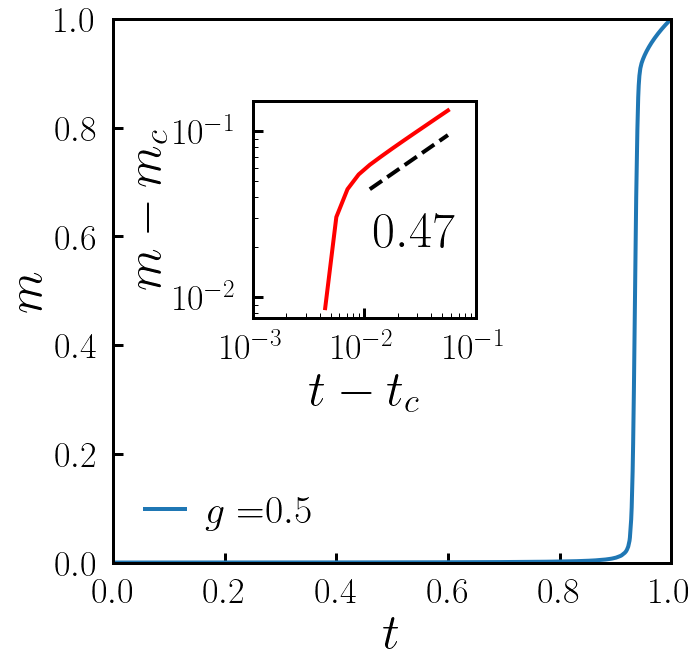

In [114]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# plot default
ax.plot(time, orderParameter[networkSize, acceptanceThreshold], label=latexString("g=")+latexFloat(0.5,1))

# default setting
xtick = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ytick = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexFloat(xtick,1))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexFloat(ytick,1))
ax.set_xlim(xtick[0], xtick[-1])
ax.set_ylim(ytick[0], ytick[-1])
ax.legend(loc='lower left')
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("m"))

# inset data
reducedT = logBinOrderParameter[networkSize, acceptanceThreshold][0]
op = logBinOrderParameter[networkSize, acceptanceThreshold][1]
mask = op>=0
reducedT = reducedT[mask]
op = op[mask]

# inset plot
ax1 = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.25,0.45,1,1), bbox_transform=ax.transAxes, loc='lower left', borderpad=0.0)
ax1.plot(reducedT, op, color='red')

# inset log fitting
fitX, fitY, beta, residual = logFit(reducedT[4:], op[4:], offset=0.15)
ax1.plot(fitX, fitY, 'k--')
ax1.text(1.2e-2,2e-2, latexFloat(beta,2))

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexString("t-t_c"))
ax1.set_ylabel(latexString("m-m_c"))
xtick = [1e-3,1e-2,1e-1]
ytick = [1e-2,1e-1]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexSci(ytick))
ax1.set_xlim([1e-3,1e-1])
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1), np.arange(10,100,10)))
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.yaxis.set_minor_locator(minortick_y)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
# plt.savefig("test")
# plt.savefig("test.png")
plt.show()


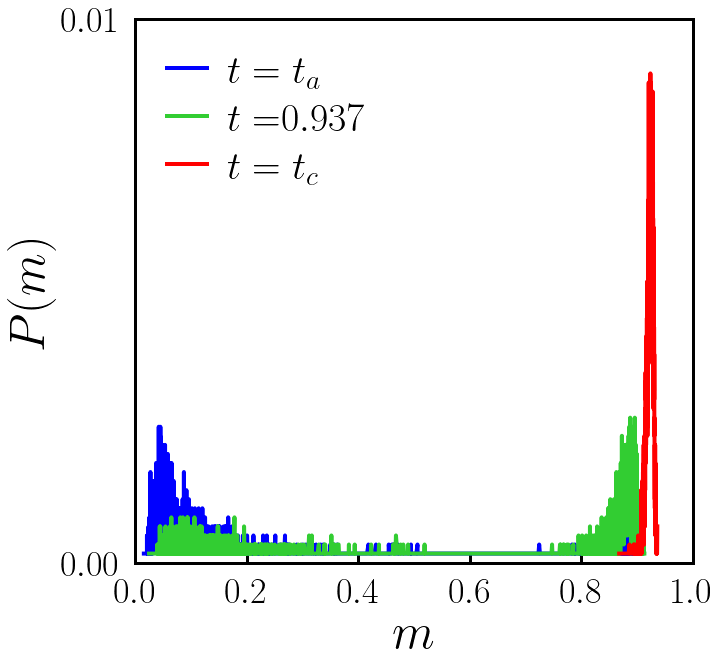

In [4]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# default plot
t = 0.932
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="blue", label=latexString("t=t_a"))

t = 0.937
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="limegreen", label=latexString("t=")+latexFloat(t))

t = 0.9482
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="red", label=latexString("t=t_c"))

# default setting
ax.legend(loc="upper left")
ax.set_xlabel(latexString("m"))
ax.set_ylabel(latexString("P(m)"))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 0.01])
xtick = np.linspace(0.0, 1.0, 6)
ytick = [0,0.01]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick,1))
ax.set_yticklabels(list_latexFloat(ytick,2))

# save and show
plt.show()

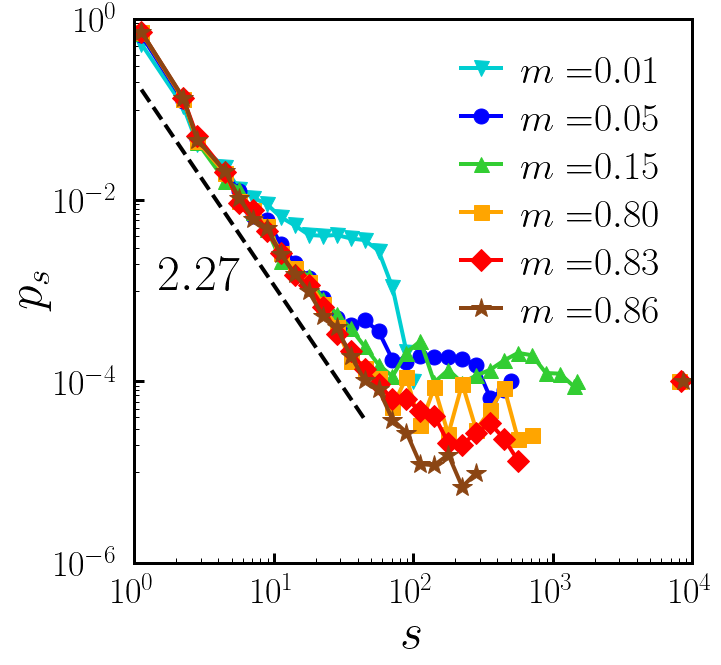

In [79]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# default plot
op = 0.01
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='v', color='darkturquoise', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='v', color='darkturquoise')

op = 0.05
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='o', color='blue', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='o', color='blue')

op = 0.15
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='^', color='limegreen', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='^', color='limegreen')

op = 0.8
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='s', color='orange', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='s', color='orange')

op = 0.8254
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='D', color='red', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='D', color='red')

# log fit
fitX, fitY, tau, residual = logFit(clusterSize[0:14], dist[0:14], offset=0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(1.5,1e-3, latexFloat(-1*tau,2))

op = 0.86
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='*', markersize=20, color='saddlebrown', label=latexString("m=")+latexFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='*', markersize=20, color='saddlebrown')

# default setting
ax.set_xlabel(latexString("s"))
ax.set_ylabel(latexString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc="upper right")
ax.set_xlim([1,1e4])
ax.set_ylim([1e-6,1])
xtick = [1e0, 1e1, 1e2, 1e3, 1e4]
ytick = [1e-6, 1e-4, 1e-2, 1]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1),np.arange(10,100,10)))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

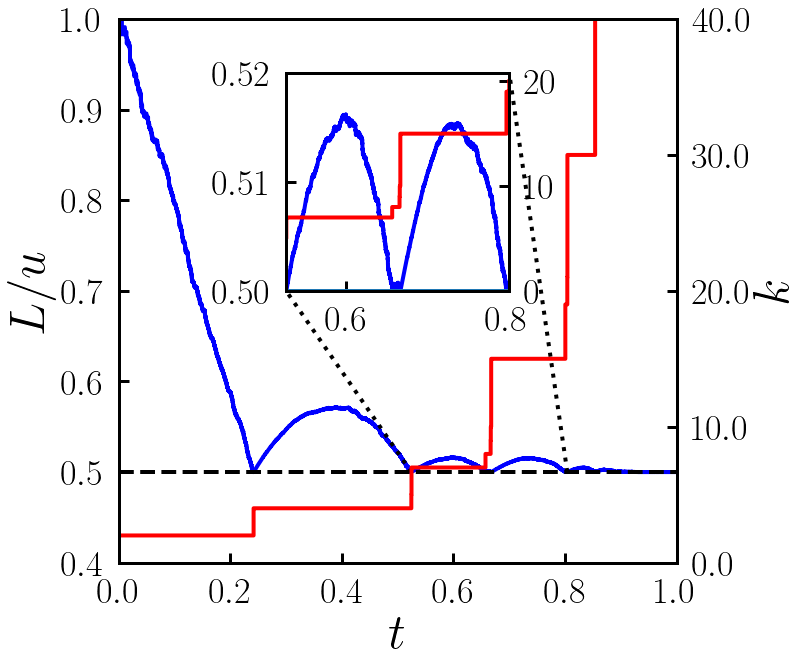

In [52]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# default and inset data
L, U, PL, PU, M, K, _ = dynamics[networkSize, acceptanceThreshold]
startIndex = 10494
endIndex = 16100
l = L[startIndex:endIndex]
u = U[startIndex:endIndex]
k = K[startIndex:endIndex]

# default plot
ax.plot(L/networkSize, L/U, color='blue')
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')

# default setting
ax.set_xlabel(latexString("t"))
ax.set_ylabel(latexString("L/u"))
ax.set_xlim([0,1])
ax.set_ylim([acceptanceThreshold-0.1,1])
xtick = np.linspace(0, 1, 6)
ytick = np.linspace(0.4, 1, 7)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexFloat(xtick, 1))
ax.set_yticklabels(list_latexFloat(ytick, 1))

# zoom line
inset_x = 0.3
inset_y = 0.5
ax.plot([L[startIndex]/networkSize, inset_x], [0.5, (acceptanceThreshold+0.9)*inset_y], 'k:')
ax.plot([L[endIndex]/networkSize, inset_x+0.4], [0.5, (acceptanceThreshold+0.9)*inset_y+(1.1-acceptanceThreshold)*0.4], 'k:')


# twin plot
ax1 = ax.twinx()
ax1.plot(L/networkSize, K, color='red')

# twin setting
ax1.set_ylabel(latexString("k"))
ax1.set_ylim([0,40])
ytick = np.linspace(0,40,5)
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexFloat(ytick, 0))

# inset plot
ax2 = inset_axes(ax, width="40%", height="40%", loc='lower left', bbox_to_anchor=(inset_x, inset_y, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
ax2.plot(l/networkSize, l/u, color='blue')
ax2.plot([l[0]/networkSize, l[-1]/networkSize], [acceptanceThreshold, acceptanceThreshold])

# inset settting
ax2.set_xlim([l[0]/networkSize, l[-1]/networkSize])
ax2.set_ylim([acceptanceThreshold, acceptanceThreshold+0.02])
xtick = [0.6,0.8]
ytick = [0.5,0.51,0.52]
ax2.set_xticks(xtick)
ax2.set_yticks(ytick)
ax2.set_xticklabels(list_latexFloat(xtick, 1))
ax2.set_yticklabels(list_latexFloat(ytick, 2))

# inset twin plot
ax3 = ax2.twinx()
ax3.plot(l/networkSize, k, color='red')

# inset twin setting
ytick = [0,10,20]
ax3.set_yticks(ytick)
ax3.set_yticklabels(list_latexFloat(ytick, 0))

# save and show
plt.show()

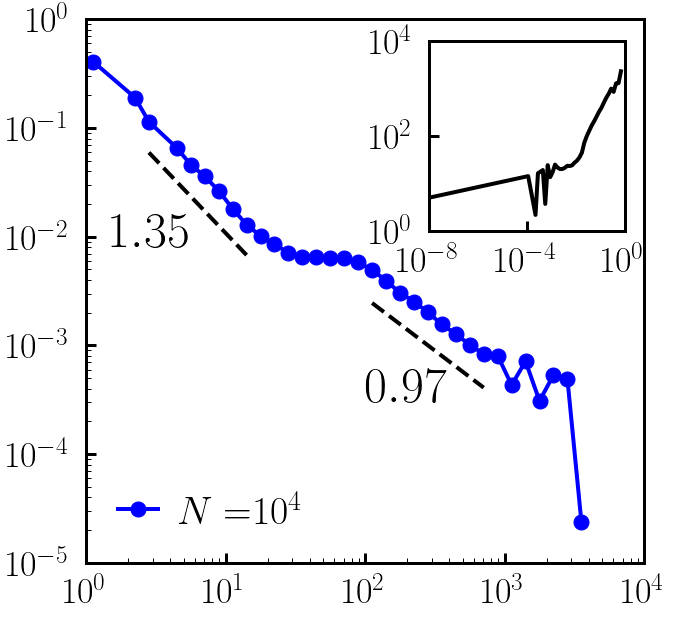

In [3]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# default plot
iet = interEventTimeDistribution_before[networkSize, acceptanceThreshold][0]
dist = interEventTimeDistribution_before[networkSize, acceptanceThreshold][1]
ax.plot(iet, dist, 'o-', color='blue', label=latexString("N=")+latexSci(networkSize))

# log fit
fitX, fitY, alpha, residual = logFit(iet[2:9], dist[2:9], offset=0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(1.5, 8e-3, latexFloat(-1*alpha,2))
fitX, fitY, alpha, residual = logFit(iet[17:26], dist[17:26], offset=0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(1e2, 3e-4, latexFloat(-1*alpha,2))


# default setting
ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0,1e4])
ax.set_ylim([1e-5,1e0])
xtick = np.power(10.0, np.linspace(0,4,5))
ytick = np.power(10.0, np.linspace(-5,0,6))
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1),np.arange(10,100,10)))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# inset plot
ax1 = inset_axes(ax, width="35%", height="35%", loc='lower left', bbox_to_anchor=(0.615, 0.61, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
reducedT = interEventTime[networkSize, acceptanceThreshold][0]
iet = interEventTime[networkSize, acceptanceThreshold][1]
ax1.plot(reducedT, iet, 'k-')

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([1e-8,1e0])
ax1.set_ylim([1e0,1e4])
xtick = [1e-8,1e-4,1e0]
ytick = [1e0,1e2,1e4]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.yaxis.set_minor_locator(minortick_y)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()


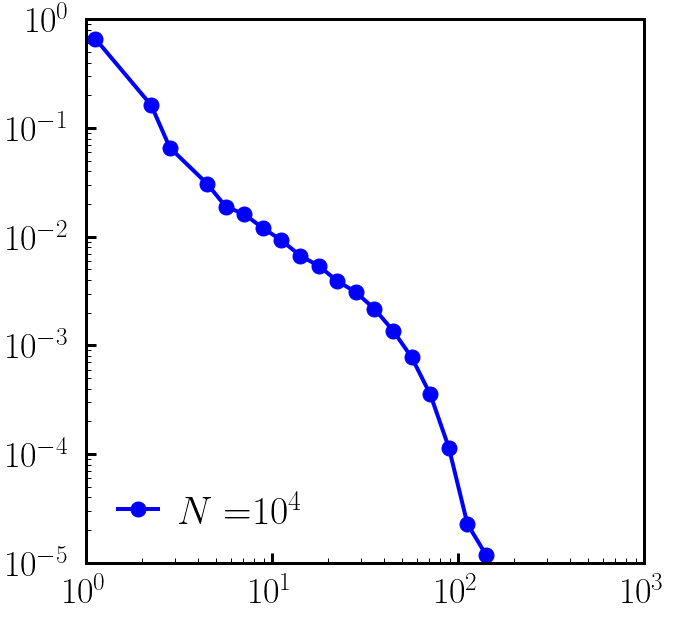

In [137]:
_, ax = plt.subplots()

networkSize = 10000
acceptanceThreshold = 0.5

# default plot
iet = interEventTimeDistribution_during[networkSize, acceptanceThreshold][0]
dist = interEventTimeDistribution_during[networkSize, acceptanceThreshold][1]
ax.plot(iet, dist, 'o-', color='blue', label=latexString("N=")+latexSci(networkSize))

# default setting
ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0,1e2])
ax.set_ylim([1e-5,1e0])
xtick = np.power(10.0, np.linspace(0,3,4))
ytick = np.power(10.0, np.linspace(-5,0,6))
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexSci(ytick))

# save and show
plt.show()
